# ANIMATION OF GRAPHS

this notebook will describe the graphs which can be animated and will show some best usecases around 

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

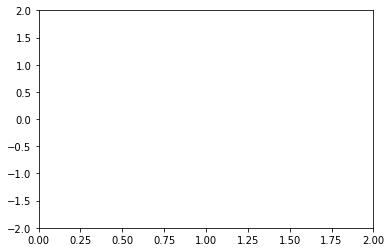

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [7]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [8]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

<img src="sine_wave.gif" width="750" align="center">

In [18]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

In [ ]:
# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)

    filename='Volcano/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

<img src="animated_volcano.gif" width="750" align="center">

MovieWriter stderr:
Unknown encoder 'h264'



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'continuousSineWave.mp4']' returned non-zero exit status 1.

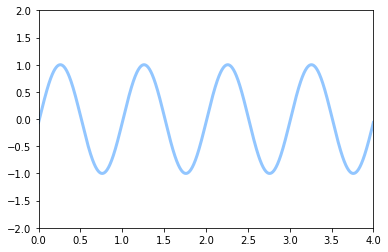

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.animation import FuncAnimation  
   
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()  
   
# marking the x-axis and y-axis 
axis = plt.axes(xlim =(0, 4),  
                ylim =(-2, 2))  
  
# initializing a line variable 
line, = axis.plot([], [], lw = 3)  
   
# data which the line will  
# contain (x, y) 
def init():  
    line.set_data([], []) 
    return line, 
   
def animate(i): 
    x = np.linspace(0, 4, 1000) 
   
    # plots a sine graph 
    y = np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(x, y) 
      
    return line, 
   
anim = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True) 
anim.save('continuousSineWave.mp4', writer = 'ffmpeg', fps = 30)
